In [4]:
# %%
# Python standard library
import math
import random

# custom utils
from utils import display_maze
from examples.dense_maze_4x3 import maze

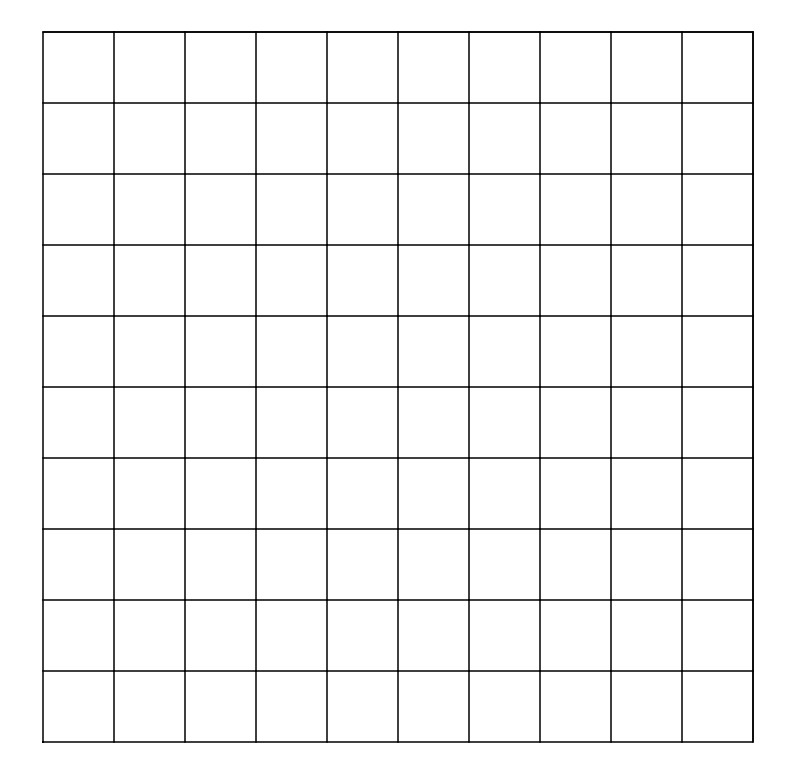

In [25]:
# Votre code ici !
#display_maze(maze)
'''
vertices = set([
    (0,0),
    (0,1),
    (1,0),
    (1,1)
])

edges = set([
    ((0,0), (1,0)),
    ((1,0), (0,0)),
    ((1,1), (1,0)),
    ((1,0), (1,1)),
    ((1,1), (0,1)),
    ((0,1), (1,1))
])

weights = {
    ((0,0), (0,1)):1,
    ((0,1), (0,0)):1
}
'''

#display_maze((vertices,edges,weights))

def full_maze(width, height):
    vertices = set()
    for col in range(width):
        for row in range(height):
            vertices.add((col,row))

    edges = set()
    weights = {}

    return (vertices,edges,weights)
display_maze(full_maze(10,10))

def empty_maze(width, height):
    
